In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Q1 Data Imbalance Problem (40%)

#### (a) 試在該數據分析流程中加入數據平衡的步驟，使用三種方法來進行數據平衡 (e.g. 使用上抽樣、下抽樣或是代價敏感學習等 )。(15%) 
- 原比例為 14:1，三種方法統一調整至 4:1。

In [2]:
# load data
df = pd.read_excel(open('MDS_Assignment4_SECOM.xlsx', 'rb'), sheet_name='secom', index_col=0)
df.head(3)

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00


In [3]:
df = df.drop('Time', axis=1)

In [4]:
# df.isnull().sum() # many
df = df.fillna(df.mean())
df['Label'].value_counts()

-1    1463
 1     104
Name: Label, dtype: int64

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]
print(X.shape, y.shape)

(1567, 590) (1567, 1)


In [6]:
# 1) over sampling：對少數群進行取後放回的重複隨機抽樣 以增加少數群的樣本數。SMOTE
# 少數類別學得不錯
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

print('Original dataset shape %s' % Counter(y['Label']))

sm = SMOTE(sampling_strategy=1/4, random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res['Label']))
# y_res = y_res['Label']
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
Resampled dataset shape Counter({-1: 1463, 1: 365})
train acc: 1.0
              precision    recall  f1-score   support

    class -1       0.91      1.00      0.95       487
     class 1       0.97      0.58      0.73       117

    accuracy                           0.92       604
   macro avg       0.94      0.79      0.84       604
weighted avg       0.92      0.92      0.91       604



In [31]:
# 2) under sampling：對多數群進行隨機抽樣 以減少多數群的樣本數 。Random、Tomek link
# 很明顯學不到少數類別
from imblearn.under_sampling import RandomUnderSampler
print('Original dataset shape %s' % Counter(y['Label']))

rus = RandomUnderSampler(sampling_strategy=1/4, random_state=0)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res['Label']))
# y_res = y_res['Label']
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
Resampled dataset shape Counter({-1: 416, 1: 104})
train acc: 0.9885057471264368
              precision    recall  f1-score   support

    class -1       0.78      1.00      0.88       134
     class 1       0.00      0.00      0.00        38

    accuracy                           0.78       172
   macro avg       0.39      0.50      0.44       172
weighted avg       0.61      0.78      0.68       172



c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [30]:
# 3) cost sensitive、one class

print('Original dataset shape %s' % Counter(y['Label']))
print('class_weight={-1:1,1:5}')
X_train, X_test, y_train, y_test = train_test_split(X, y['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=5, random_state=0, class_weight={-1:1,1:5})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
class_weight={-1:1,1:5}
train acc: 0.9599618684461392
              precision    recall  f1-score   support

    class -1       0.94      1.00      0.97       486
     class 1       0.00      0.00      0.00        32

    accuracy                           0.94       518
   macro avg       0.47      0.50      0.48       518
weighted avg       0.88      0.94      0.91       518



c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\luweb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

#### (b) (5%) 建 議選用哪種方法最為合適？為什麼？

建議選用"over sampling"方法，我固定模型參數和樣本比例，從實驗結果得出，只有over sampling的實驗組的testing data能預測出少數類別，precision 97%, recall 58%，表現已經不錯了，另外兩種方法皆無法預測出少數類別。可以判斷說是，原始資料集的少數樣本太少了，無法讓模型學到特徵，若不實際增加樣本數，則無任何數據面的幫助。

#### (c) (10%) 
對於數據多數群與少數群的比例應當調整至多少？為什麼？試透過調整生成比率
(i.e. 敏感度分析 )來看模型分類結果。 (提示：將敏感度分析以繪圖呈現兩條曲線， x軸為
不同生成比例、 y軸為偽陽性率 (false positive rate)與偽陰性率 (false negative rate))

In [46]:
# 從 1:13 ~ 1:1
from sklearn.metrics import confusion_matrix
tp_arr = []
fp_arr = []
sample_rate_arr = []
for i in range(13,1-1,-1):
    sample_rate = 1/i
    sm = SMOTE(sampling_strategy=1/i, random_state=42)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res['Label']), end=' ')
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)
    clf = RandomForestClassifier(max_depth=10, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tp_rate = tp/(tp+fn) # 正樣本預測結果數/正樣本實際數
    fp_rate = 0 if fp == 0 else fp/(fp+tn) # 被預測為正的負樣本結果數/負樣本實際數
    tp_arr.append(tp_rate)
    fp_arr.append(fp_rate)
    sample_rate_arr.append(f'1:{i}')
    print('train acc:', clf.score(X_train, y_train))
    # print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Resampled dataset shape Counter({-1: 1463, 1: 112}) train acc: 0.95260663507109
Resampled dataset shape Counter({-1: 1463, 1: 121}) train acc: 0.9538171536286523
Resampled dataset shape Counter({-1: 1463, 1: 133}) train acc: 0.9588400374181478
Resampled dataset shape Counter({-1: 1463, 1: 146}) train acc: 0.9628942486085343
Resampled dataset shape Counter({-1: 1463, 1: 162}) train acc: 0.9586397058823529
Resampled dataset shape Counter({-1: 1463, 1: 182}) train acc: 0.9637023593466425
Resampled dataset shape Counter({-1: 1463, 1: 209}) train acc: 0.975
Resampled dataset shape Counter({-1: 1463, 1: 243}) train acc: 0.9860017497812773
Resampled dataset shape Counter({-1: 1463, 1: 292}) train acc: 0.9957446808510638
Resampled dataset shape Counter({-1: 1463, 1: 365}) train acc: 1.0
Resampled dataset shape Counter({-1: 1463, 1: 487}) train acc: 0.9992343032159265
Resampled dataset shape Counter({-1: 1463, 1: 731}) train acc: 1.0
Resampled dataset shape Counter({-1: 1463, 1: 1463}) train ac

由結果顯示，樣本越平均，測試資料集的 tp rate 越高，但也會換來 fp rate 慢慢的增長。

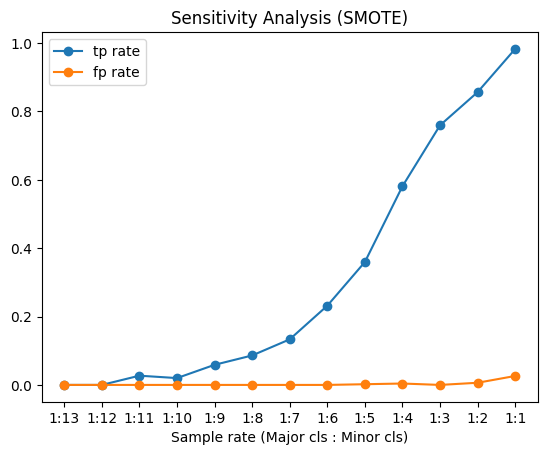

In [54]:
plt.figure()
plt.plot(tp_arr, label='tp rate', marker='o')
plt.plot(fp_arr, label='fp rate', marker='o')
plt.legend()
plt.xticks(list(range(len(sample_rate_arr))), sample_rate_arr)
plt.title('Sensitivity Analysis (SMOTE)')
plt.xlabel('Sample rate (Major cls : Minor cls)')
plt.show()

#### (d) (10%) 試說明特徵挑選步驟應於數據平衡 前或後 ，這對預測結果有何影響?

我們由 OSL 選出 pvalue < 0.01 的 14 個特徵，分別是 `['Sensor_60', 'Sensor_139', 'Sensor_253', 'Sensor_412', 'Sensor_133', 'Sensor_153', 'Sensor_391', 'Sensor_440', 'Sensor_3', 'Sensor_57', 'Sensor_288', 'Sensor_567', 'Sensor_41', 'Sensor_360']`。同樣的取這 14 個欄位進行一次 RF 作為實驗組。

由結果可得出，挑選重要變數後，少數類別的 f1-score 從原本的 0.73 降低為 0.64，recall 從 0.58 降低為 0.48，可見特徵挑選在此資料集不是很有效益，或許可以放寬挑選變數的 threshold 來挑選更多變數。也因為 DecesionTree 算法本身就有進行變數挑選的行為，我們不需特別再為它額外挑選重要變數。

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data_X_const = sm.add_constant(X) # 做線性回歸前 要手動加上截距(常數項)
data_X_const = data_X_const.rename(columns={"const": "Intercept"})

model = sm.OLS(y, data_X_const)
osl_result = model.fit()
osl_pvalues = osl_result.pvalues

selected_attr = []
for index in osl_pvalues.sort_values().index:
  if osl_pvalues[index] < 0.01:
    selected_attr.append(index)
print("Selected:", len(selected_attr),'\n', selected_attr)

Selected: 14 
 ['Sensor_60', 'Sensor_139', 'Sensor_253', 'Sensor_412', 'Sensor_133', 'Sensor_153', 'Sensor_391', 'Sensor_440', 'Sensor_3', 'Sensor_57', 'Sensor_288', 'Sensor_567', 'Sensor_41', 'Sensor_360']


In [12]:
print('Original dataset shape %s' % Counter(y['Label']))

sm = SMOTE(sampling_strategy=1/4, random_state=42)
X_res, y_res = sm.fit_resample(X[selected_attr], y) # 只使用顯著的 14 個欄位
print('Resampled dataset shape %s' % Counter(y_res['Label']))
# y_res = y_res['Label']
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res['Label'], test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('train acc:', clf.score(X_train, y_train))
print(classification_report(y_test, y_pred, target_names=['class -1', 'class 1'])) # print test result

Original dataset shape Counter({-1: 1463, 1: 104})
Resampled dataset shape Counter({-1: 1463, 1: 365})
train acc: 0.9852941176470589
              precision    recall  f1-score   support

    class -1       0.89      1.00      0.94       487
     class 1       0.97      0.48      0.64       117

    accuracy                           0.90       604
   macro avg       0.93      0.74      0.79       604
weighted avg       0.90      0.90      0.88       604



### Q2 Meta heuristic algorithm (30%) 

本範例是一個具有20個工件的單機台 flow shop 問題，排程目標為最小化總加權延遲 (Total weighted tardiness) ，工件資訊如下圖所示

In [2]:
import numpy as np
import time
import copy

In [4]:
num_job=20 # number of jobs

p=[10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3]
d=[50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99]
w=[10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5]

population_size=int(30) # default value is 30
crossover_rate=float(0.8) # default value is 0.8
mutation_rate=float(0.1) # default value is 0.1
mutation_selection_rate=float(0.5)
num_mutation_jobs=round(num_job*mutation_selection_rate)
num_iteration=int(2000) # default value is 2000

start_time = time.time()

In [5]:
# 產生母體 population_list
Tbest = float('inf')
best_list,best_obj=[],[]
population_list=[]
for i in range(population_size):
    random_num=list(np.random.permutation(num_job)) # generate a random permutation of 0 to num_job-1
    population_list.append(random_num) # add to the population_list

In [9]:
for n in range(num_iteration):
    Tbest_now=float('inf')          
    '''-------- uniform crossover --------'''
    parent_list=copy.deepcopy(population_list)
    offspring_list=copy.deepcopy(population_list)
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    print(S)

    for m in range(int(population_size/2)):
        crossover_prob=np.random.rand()
        if crossover_rate>=crossover_prob:
            parent_1= population_list[S[2*m]][:]
            parent_2= population_list[S[2*m+1]][:]
            child_1=['na' for i in range(num_job)]
            child_2=['na' for i in range(num_job)]
            fix_num=round(num_job/2)
            g_fix=list(np.random.choice(num_job, fix_num, replace=False))
            
            for g in range(fix_num):
                child_1[g_fix[g]]=parent_2[g_fix[g]]
                child_2[g_fix[g]]=parent_1[g_fix[g]]
            c1=[parent_1[i] for i in range(num_job) if parent_1[i] not in child_1]
            c2=[parent_2[i] for i in range(num_job) if parent_2[i] not in child_2]
            
            for i in range(num_job-fix_num):
                child_1[child_1.index('na')]=c1[i]
                child_2[child_2.index('na')]=c2[i]
            offspring_list[S[2*m]]=child_1[:]
            offspring_list[S[2*m+1]]=child_2[:]
    break

[21, 4, 11, 12, 28, 10, 24, 16, 22, 20, 0, 19, 25, 5, 1, 15, 29, 8, 9, 18, 23, 13, 3, 26, 6, 2, 7, 17, 14, 27]


In [11]:
parent_1

[7, 15, 6, 17, 13, 3, 10, 16, 11, 0, 9, 4, 1, 19, 14, 2, 18, 5, 12, 8]

In [12]:
parent_2

[8, 13, 9, 14, 12, 1, 2, 7, 16, 17, 0, 6, 3, 15, 18, 4, 10, 11, 5, 19]

In [13]:
child_1

[8, 13, 7, 10, 11, 0, 2, 9, 16, 17, 1, 6, 3, 15, 18, 4, 19, 14, 5, 12]